<img src="../figures/logos/logo_usc.jpg" align=right width='80px'/>
<br>

<table width="100%">
<td style="font-size:40px;font-style:italic;text-align:left;background-color:rgba(0, 220, 170,0.7)">
Quantum Fourier Transform
</td></table>



$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\Lin}{\hbox{Lin}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $



In [2]:
import sys
sys.path.append('../')
import macro_tQ as tQ
import matplotlib.pyplot as plt

import numpy as np

We have seen that the basic algorithms that we studied in the previous lecture work out in a sequence of three steps.

1. initialize to the even superposition of all elements of the computational basis

2. implement the oracle and let it act in parallel on all the basis states at the same time

3. look for destructive interference of all paths that lead to a wrong solution 

In the third step, the interference has been performed by acting with the Walsh-Hadamard gate

$$
U_{WH} : \ket{x} \to \ket{\tilde x} = H^{\otimes n} \ket{x} =   \frac{1}{\sqrt{N}}\sum_{y}(-1)^{x\cdot y}\ket{y} =   \frac{1}{\sqrt{N}}\sum_{y} e^{i\pi   x\cdot y} \ket{y} 
$$
    
where $N=2^n$.     This has led to nice solutions for the Deusch-Josza, the Bernstein-Vazirani and the Simon problem. In the last case the gain has been impressive, that is exponential.  

In order to enhance the applicability of this strategy in order to tackle  more interesting algorithms, we will introduce a more powerful interference machinery, the Quantum Fourier Transform.

# The Quantum Fourier Transform

<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b>Definition:</b>
<br>    
The <i>Quantum Fourier Transform</i> is a unitary operation $U_{QFT}\in\Lin(\Hil)$
    defined by the action on the elements of the <i>computational basis</i> to a new <i>Fourier basis</i>
<br>
$$
U_{QFT}: \ket{x} \to {\ket{\tilde x}} = \frac{1}{\sqrt{N}}\sum_{y}\omega^{xy}\ket{y} =   \frac{1}{\sqrt{N}}\sum_{y} e^{2\pi i  xy /N} \ket{y} 
$$
where $~~\omega = e^{2\pi i  /N}~~$ and 
$~~x,\tilde x=0,...,N-1 = 2^n-1~~$    
</div>

The searched for *interference* effects of the new phase factor $\omega = e^{2\pi i/N}$  are summarized in the important [zero-sum](../00_Formalismo/01_Numeros_Complejos.ipynb#ejempnc) formula that we studied in the introductory chapter on  complex numbers.
<br>
<br>
$$
\fbox{$ \displaystyle
\frac{1}{N} \sum_{y=0}^{N-1} e^{2\pi i xy/N} = \delta_{x \, 0 {\rm mod}N}$}
$$


<div class="alert alert-block alert-success">
<b> Exercise: </b>    

use this expression to demonstrate that, by inverting the signs of the phases, we obtain the inverse QFT. That is, demonstrate that, if   
<br>
$$
U^{-1}_{QFT}\ket{x}  =  \frac{1}{\sqrt{N}}\sum_{y} e^{-2\pi i  xy /N} \ket{y} 
$$
it follows that     
$$
U_{QFT}^{-1}(U_{QFT} \ket{x}) ) \ket{x}
$$    
This confirms that it is a unitary operator $U_{QFT}^{-1} = U_{QFT}^\dagger$.     
</div>

<div class="alert alert-block alert-danger">
<b>Note:</b>
    
of course, the operation $U_{TFC}$ is not restricted to elements of the computational basis. 

Acting on a vector $\ket{f} = \sum_x f(x)\ket{x}$ with components $f(x)$ in the basis $\ket{x}$ we will obtain another vector
<br>    
<br>
\begin{eqnarray}
\ket{\tilde f} &=& U_{TCF}\ket{f} = \sum_x f(x) U_{TCF}\ket{x} \nonumber\\
&=& \sum_x f(x) \frac{1}{\sqrt{N}}\sum_y e^{2\pi i xy} \ket{y}\\
&=&  \sum_y\left( \frac{1}{\sqrt{N}}\sum_x f(x) e^{2\pi i xy}\right) \ket{y}\\
    &=& \sum_y \tilde f(y) \ket{y}
\end{eqnarray}

where the new components $\tilde f(x)$ are now
$$
\fbox{$\tilde f(y) = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} e^{2\pi i yx} f(x)$}
$$
<br>    

This rule defines what is *classically* known as the *Discrete Fourier Transform* (DFT) of the data set 
<br>
<br>
    
$$
\{f(0),f(1),...,f(N-1)\}~ \stackrel{\hbox{DFT}}{\longrightarrow}~ \{\tilde f(0),\tilde f(1),...,\tilde f(N-1)\}$$


</div>


$\bullet$ In general, the matrix elements will evidently be the phases
<br>
<br>

$$
\bra{x} U_{TFC} \ket{y} =  \frac{1}{\sqrt{N}} e^{2\pi i  x y/N} =\frac{1}{\sqrt{N}} \omega^{xy}
 = \frac{1}{\sqrt{N}} \begin{bmatrix}
1&1&1&1&\cdots &1 \\
1&\omega_N&\omega_N^2&\omega_N^3&\cdots&\omega_N^{N-1} \\
1&\omega_N^2&\omega_N^4&\omega_N^6&\cdots&\omega_N^{2(N-1)}\\ 1&\omega_N^3&\omega_N^6&\omega_N^9&\cdots&\omega_N^{3(N-1)}\\
\vdots&\vdots&\vdots&\vdots&\ddots&\vdots\\
1&\omega_N^{N-1}&\omega_N^{2(N-1)}&\omega_N^{3(N-1)}&\cdots&\omega_N^{(N-1)(N-1)}
\end{bmatrix}
$$

<div class="alert alert-block alert-warning">
<b>Example:</b>
 
$\bullet$ For $n=1 \to \omega = e^{2\pi i /2^1} = -1$ and the QFT is none other than the Hadamard gate
<br>
<br>
$$
U_{QFT} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = H
$$

Its action is 

$$
U_{QFT}\ket{0} = \ket{+}~~~~~~~~~,~~~~~~~~~~  U_{QFT}\ket{1} = \ket{-}
$$
<br>


We observe that the image vectors are located in the equatorial plane of the Bloch sphere

</div>

<br>

<div class="alert alert-block alert-warning">
$\bullet$ For $n=2 \to  \omega = e^{2\pi i/2^2} = i$ and then

$$
U_{TFC} =\frac{1}{2}
\begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & -i & -1 & i \\ 1 & - 1 & 1 & - 1 \\ 1 & i & -1 & -i  \end{bmatrix}
$$ 

<br>

Observe that the sum of any column or row that is not the first one equals zero
</div>

<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b>Theorem:</b>
<br>   
    The vectors of the <i>Fourier basis</i> are <i>factorizable</i> states into products of single-qubit states that are located <i>on the equator</i> of all the Bloch spheres.
</div>

*Proof*

Notation: a number  $x\in {\mathbb Q} $ can be represented in base 2

\begin{eqnarray}
x  
&=&  x_{n-1}2^{n-1}   +   \cdots + x_1 2^1+ x_0 2^0    +  x_{-1}2^{-1} +  \cdots  +   x_{-m}2^{-m}\, \\ \rule{0mm}{10mm}
&=&
x_{n-1} \cdots x_1 x_0\, .\, x_{-1}  \cdots x_{-m} \nonumber\\ \rule{0mm}{10mm}
&=&  x_{n-1} \cdots x_1 x_0 + 0.x_{-1}  \cdots x_{-m} 
\end{eqnarray}


in particular, if $y\in S_n =[0,...,2^n-1],~$ in base 2 we would have

\begin{eqnarray}
y &=& y_{n-1} \ldots   y_2y_1 y_0 \nonumber\\  \rule{0mm}{12mm}
y/2&~=~&  y_{n-1}...y_2y_1 + 0. y_0 \nonumber\\ \rule{0mm}{12mm}
y/2^2 &~=~&  y_{n-1}...y_2 + 0.y_1 y_0 \nonumber\\ \rule{0mm}{12mm}
&\vdots & \nonumber \\ \rule{0mm}{12mm}
y/2^n &~=~&   0.y_{n-1}y_{n-2}...y_0 \, 
\end{eqnarray}



Now let's study the action of $U_{\rm TFC}$ on an element $\ket{x} = \ket{x_{n-1}}\ket{x_{n-2}}... \ket{x_0}$
of the computational basis 
<br>

\begin{eqnarray}
 \hspace{0.5cm}\ket{\tilde x}  ~\equiv ~  U_{\rm TFC}\ket{x}  &=&  \frac{1}{\sqrt{N}} \sum_{y=0}^{2^n-1} e^{2\pi i  xy/2^n}\ket{y} \label{TFC}
\nonumber\\ \rule{0mm}{9mm}
&=&  \frac{1}{\sqrt{N}} \sum_{y_1,...,y_n=\{0,1\}} e^{ 2\pi i x \left( y_{n-1}2^{n-1} + y_{n-2}2^{n-2}  + ... + y_0\right)/2^n } \ket{y_{n-1}}\ket{y_{n-2}}\ldots \ket{ y_0} \hspace{5cm}
\nonumber\\ \rule{0mm}{9mm}
&=&  \frac{1}{\sqrt{N}} \sum_{y_0,...,y_{n-1}=\{0,1\}} e^{2\pi i x \left(\frac{y_{n-1}}{2} + \frac{y_{n-2}}{2^2}  + ... + \frac{y_0}{2^n}\right) } \ket{y_{n-1}}\ket{y_{n-2}}\ldots \ket{ y_0}  
\end{eqnarray}

\begin{eqnarray}
&&=  \frac{1}{\sqrt{N}} \left( \ket{0} + e^{2\pi i \frac{x}{2}}\ket{1}\right)\left( \ket{0} + e^{2\pi i \frac{x}{2^2}}\ket{1}\right)...\left( \ket{0} + e^{2\pi i \frac{x}{2^n}}\ket{1}\right)
\nonumber\\ 
%\pause
\rule{0mm}{14mm}
&&= \frac{1}{\sqrt{N}} \left( \ket{0} + e^{2\pi i \, 0.x_0}\ket{1}\right)\left( \ket{0} + e^{2\pi i \, 0.x_1x_0}\ket{1}\right)...\left( \ket{0} + e^{2\pi i \, 0.x_{n-1}...x_0}\ket{1}\right)   \nonumber \\
\rule{0mm}{14mm}
& &\equiv ~~ \ket{\tilde x_{n-1}}\ket{\tilde x_{n-2}}\cdots \ket{\tilde x_{0}}   
\end{eqnarray}



 We have used that the integer parts of $x$ do not contribute to the phases
<br>
<br>
$$
e^{2\pi i x/2} = e^{2\pi i (x_{n-1}...x_1 + 0. x_0)}= e^{2\pi i (x_{n-1}...x_1)}e^{2\pi i \, 0. x_0} = e^{2\pi i\, 0.x_0}
$$

The last expression is so useful and important that we could almost take it as the definition of the Quantum Fourier Transform.
<br>
As promised:

- the result is a factored state   $\ket{\tilde x} = \ket{\tilde x_{n-1}}\ket{\tilde x_{n-2}}\cdots \ket{\tilde x_{0}} $ 
<br>
    
-  each one of the qubit states $\ket{\tilde x_k}$ live on the equator of the Bloch sphere at a certain polar angle.
$~~~~~\rule{2.5mm}{2.5mm}$


The expression 
$$
 U_{\rm TFC}\ket{x} = \ket{\tilde x_{n-1}}\ket{\tilde x_{n-2}}\cdots \ket{\tilde x_{0}}   
$$    
is actually the action we want to write as a quantum circuit. We can do this in two steps. 

- To bring each qubit state $\ket{0}$ or $\ket{1}$ to the equator of the Bloch sphere we just need to apply the Hadamard gate. $\ket{x_k}\to H\ket{x_k}$.

- After that, we need to apply a rotation $R_z(\theta_k)$ that implements a $k$ dependent phase to the $\ket{1}$ state. 

## Circuit associated with a TFC

Let's look at the circuit

<br>
<figure><center>
<a id='fig_ref'></a>
<img src="figuras/QFT2.png" align=center width='80%'/>
<center></center>
</center></figure>
<br>

Only involves

- the Hadamard gate $H$ and

- the *discrete phase gate* $R_k \equiv P(\phi = \pi/2^{k-1})$
<br>
$$
R_{k} = \begin{bmatrix} 1 & 0 \\ 0 & e^{ 2\pi i\frac{1 }{2^{k}}} \end{bmatrix}  ~~~\Leftrightarrow ~~~R_k\ket{y} = e^{2\pi i\frac{y}{2^k}} \ket{y}
$$

which appears in a controlled manner $\cg{R_k}$.


It will be useful to write the *action* of $\cg R_k$ in the following form, if $\ket{x}$ is the control qubit

$$
\cg{R_k}\ket{x}\ket{y} = \ket{x}R^{x}_{k}\ket{y}  = \ket{x}  e^{2 \pi i   \frac{y}{2^{k}}x}\ket{y}
$$


Let's analyze the action of the first block 
$$
(H\ket{x_{n-1}})\ket{x_{n-2}...x_0} =\left( \ket{0} + e^{2\pi i \left(\frac{x_{n-1}}{2}\right)} \ket{1}\right) \ket{x_{n-2}...x_0}
$$

$$
\left(\rule{0mm}{3mm} R_{2}^{x_{n-2}}H\ket{x_{n-1}}\right) \ket{x_{n-2}...x_0}=
\left( \ket{0} + e^{2\pi i \left(\frac{x_{n-1}}{2}\right)}R_{2}^{x_{n-2}} \ket{1}\right) \ket{x_{n-2}...x_0}= 
 \left( \ket{0} + e^{2\pi i \left(\frac{x_{n-1}}{2} + \frac{x_{n-2}}{2^2}\right)} \ket{1}\right) \ket{x_{n-2}...x_0} 
$$

\begin{eqnarray}
&\vdots& \nonumber\\
\left(\rule{0mm}{5mm}R_{{(n-1)}}^{x_{0}} ... R_{3} ^{x_{n-3}}  R_{2}^{x_{n-2}}H\ket{x_{n-1}}\right) \ket{x_{n-2}...x_0}& =& 
\left( \ket{0} + e^{2\pi i \, \left(\frac{x_{n-1}}{2} + \frac{x_{n-2}}{2^2}+\ldots \frac{x_0}{2^n}\right)}  \ket{1} \right) \ket{x_{n-2}...x_0} \nonumber\\ 
\rule{0mm}{5mm}
 & =& 
\left( \rule{0mm}{5mm}\ket{0} + e^{2\pi i \, 0.x_{n-1}\cdots x_0}  \ket{1} \right) \ket{x_{n-2}...x_0} \nonumber\\ \rule{0mm}{12mm}
& \equiv&  \ket{\tilde x_{0}} \ket{x_{n-2}... x_1x_0} \nonumber
\end{eqnarray}


The first block has generated the equatorial state $\ket{\tilde x_0}$ but *in the wrong position*!

If we repeat the same procedure with the following qubits $\ket{x_{n-2}}$ successively, we will arrive at the following expression
<br>

$$
 \ket{\tilde x_{0}}\ket{\tilde x_{1}}  ... \ket{\tilde{x}_{n-2}} \ket{\tilde x_{n-1}}
$$

which is *almost* the state we were looking for

The final part of the circuit introduces the SWAP operators that rectify the order of the qubits 
<br>
<br>
$$
\hbox{SWAP}^{\otimes n} \,  (\ket{\tilde x_{0}}  ...  \ket{\tilde x_{n-1}} ) ~=~ 
\ket{\tilde x_{n-1}} ... \ket{\tilde{x}_{0}} ~~ \equiv ~~ \ket{\tilde x}
$$

### Implementation:

We are going to generate a TFC gate that performs a Quantum Fourier Transform

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

def TFC(n):
    qc = QuantumCircuit(n)    

    for j in reversed(range(n)):
        qc.h(j)
        for k in range(j):
            qc.cp(np.pi/2**(j-k), k, j)
    #qc.barrier()
    for j in range(n//2):
        qc.swap(j,n-j-1)

    return qc.to_gate(label='TFC')        

we can visualize the circuit that we have converted into a gate

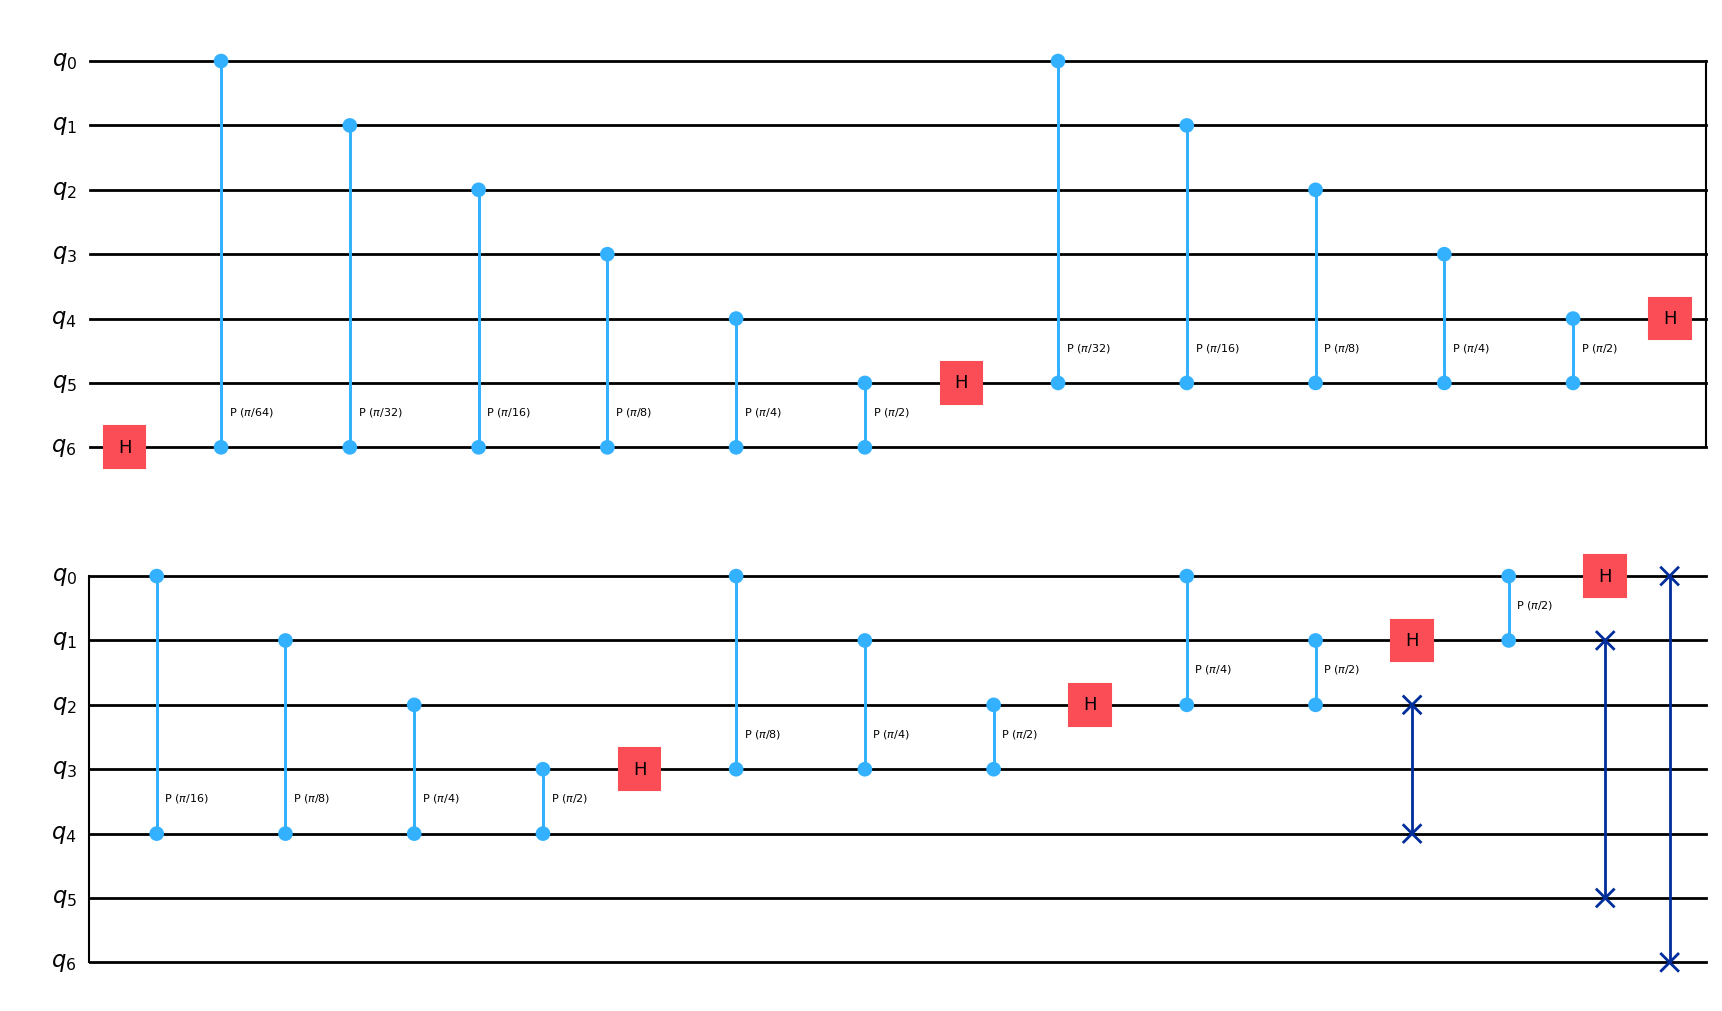

In [11]:
TFC(7).definition.draw('mpl')

and also its inverse

In [3]:
def TFC_adj(n):
    qc = QuantumCircuit(n)    

    for j in reversed(range(n//2)):
        qc.swap(j,n-j-1)            
    for j in range(n):
        for k in reversed(range(j)):
            qc.cp(-2*np.pi/2**(j-k+1), k, j)
        qc.h(j)

    return qc.to_gate(label='TFC_adj')



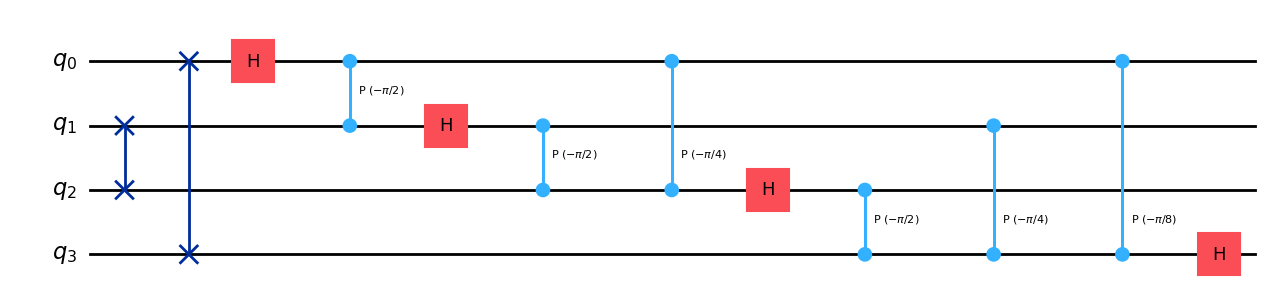

In [13]:
TFC_adj(4).definition.draw('mpl')

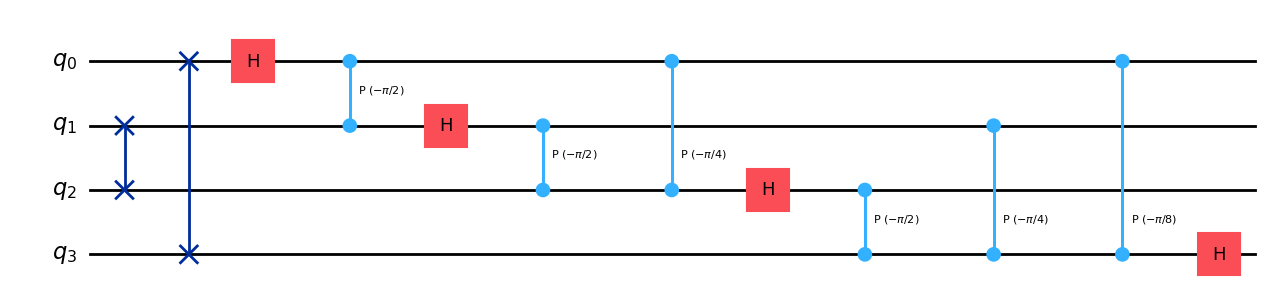

In [5]:
TFC(4).inverse().definition.draw('mpl')

Now we can initialize a state and obtain the associated TFC state

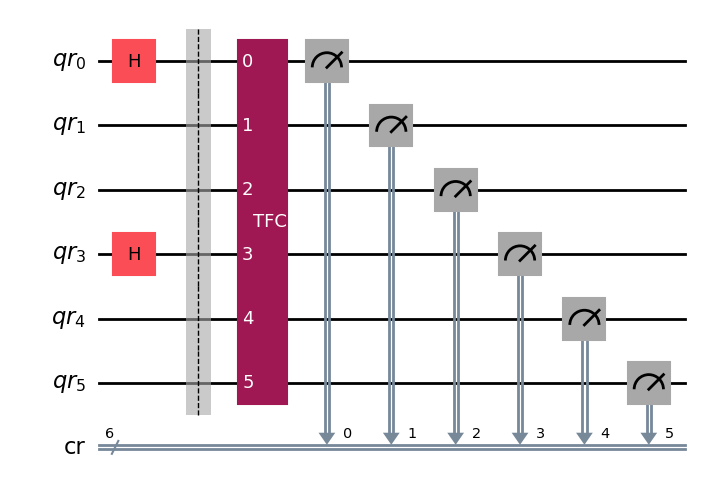

In [6]:
# Creamos el circuito 
num_qubits=6
qr = QuantumRegister(num_qubits,name='qr')
cr = ClassicalRegister(num_qubits,name='cr')
qc = QuantumCircuit(qr,cr,name="QFT")

# Inicialización 1 de un estado de entrada
#qc.x(1)
#qc.rx(np.pi/3,0)
qc.h(0)
#qc.cx(0,1)
qc.h(3)

# Inicialización 2 de un estado de entrada
#qc.h(range(num_qubits))
qc.barrier()
# añadimos la TFC
qc.append(TFC(num_qubits),qr[:])
qc.measure(qr,cr)
qc.draw(output='mpl')

Now you can vary the input state and observe the result at the output.

For example, the TFC of the uniform superposition state $\ket{+\ldots+}= \frac{1}{\sqrt{N}}\sum_{i} \ket{i}$ is the state $|0 \ldots 0>$


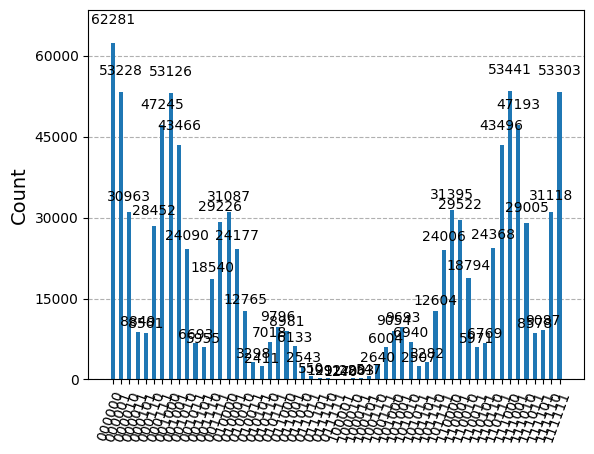

In [24]:
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector

backend = AerSimulator()
qct = transpile(qc,backend)

nshots = 1000000
counts = backend.run(qct,shots=nshots).result().get_counts()

plot_histogram(counts)


It is important to run this circuit for different initial states

<div class="alert alert-block alert-danger">

-  The number of gates we have needed is $n$ Hadamard gates and $n(n-1)/2$ controlled phase $\cg{R}$. In total, this is a number of order ${\cal O}(n^2)$. 

 Classically, the most efficient algorithm to compute
the Discrete Fourier Transform (DFT) requires ${\cal O}(n 2^n)$, therefore the QFT transforms an $NP$-type problem into a $P$-type one.

<br>
    
-  In reality, we have not computed the QFT, since from the final state we cannot deduce the phases of the elements of the base separately, which constitutes the Fourier transform of the input qubit.

    
-  Therefore, the point will be to be able to <b>find problems</b> in which the QFT is an ingredient that provides an exponential advantage

</div>

# Application 1: search for a period

A direct application of the quantum Fourier transform is related to periodic functions $f: S_n \to S_{m}$.

**Promise:** $f: S_n \to S_{m}$ is surjective with only one period $f(x+P) = f(x)$.

**Problem**: find $P$ with a minimum number of queries to the oracle.

If $P$ is the length of the period, $M = \hbox{int}(N/P)$, with $N = 2^n$, the integer part, will be the number of repetitions that {\em fit}. 

- In the most favorable case, $P$ will exactly divide $N$, that is $N/P = M$. 

- In the most general case, there will be a remainder $N/P = M + $remainder. 

```

valores de f(x) en un período : [ 72  25  29   1  77 122]
['1001000', '0011001', '0011101', '0000001', '1001101', '1111010', '1001000', '0011001', '0011101', '0000001', '1001101', '1111010', '1001000', '0011001', '0011101', '0000001', '1001101', '1111010', '1001000', '0011001', '0011101', '0000001', '1001101', '1111010', '1001000', '0011001', '0011101', '0000001', '1001101', '1111010', '1001000', '0011001', '0011101', '0000001', '1001101', '1111010', '1001000', '0011001', '0011101', '0000001', '1001101', '1111010', '1001000', '0011001', '0011101', '0000001', '1001101', '1111010', '1001000', '0011001', '0011101', '0000001', '1001101', '1111010', '1001000', '0011001', '0011101', '0000001', '1001101', '1111010', '1001000', '0011001', '0011101', '0000001', '1001101', '1111010', '1001000', '0011001', '0011101', '0000001', '1001101', '1111010', '1001000', '0011001', '0011101', '0000001', '1001101', '1111010', '1001000', '0011001', '0011101', '0000001', '1001101', '1111010', '1001000', '00110

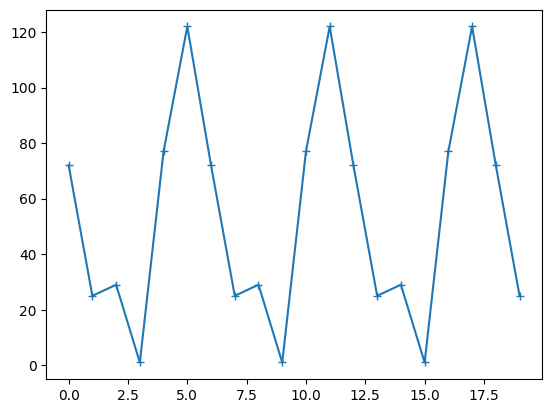

In [8]:
def f_periodica(Nn,Nm,P,show_values=True): 
    # hay argumentos Nm=2^n y Nm=2^m para el caso de funciones de S_n -> S_m    
    N= Nn
    M= int(N/P)
    values= np.random.choice(Nm-1,P,replace=False) #seleccionamos P valores aleatorios entre 1 y Nm 
    if show_values:
        print('valores de f(x) en un período :',values)
    
    fout=np.zeros(N)
    for m in range(M+1):
        for p in range(P):  
            if p + m*P < N:
                fout[p + m*P] = values[p]
#    print('tabla binaria de verdad completa de la función f(x):',  fout)
    fout_binary = [format(int(i), 'b').zfill(int(np.ceil(np.log2(np.max(fout)+2)))) for i in fout]
    
    return fout_binary,fout

' por ejemplo veamos una función con Nn=Nm = 8 y P= 4'
fout_binary, fout = f_periodica(128,128,6,show_values=True)        
print(fout_binary)
plt.plot(fout[:20],'-+')

Classically, on average we would need to evaluate $f$ a number of times on the order of $N/2 = 2^n/2$ to discern between the last two possibilities $P=N/2$ of $P=N$.

<div class="alert alert-block alert-danger">
Note the difference with Simon's problem, where the periodicity was $f(x\oplus r) = f(x)$ for $x\oplus r$ a <i>bitwise</i> sum
</div>

Let's start by analyzing the algorithm as if it were Simon's problem

<br>
\begin{eqnarray}
\ket{\Psi} &=& U_f (H^{\otimes n}\otimes I) \ket{0}_n  \ket{0}_m  \nonumber\\ \rule{0mm}{15mm}
&=& \rule{0mm}{8mm}U_f   \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} \ket{x}_n\ket{0}_m \nonumber\\ \rule{0mm}{15mm}
&=&   \rule{0mm}{7mm} \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} \ket{x}_n\ket{f(x)}_m \rule{0mm}{15mm}
\end{eqnarray}


Let's consider the case $N/P\in {\mathbb Z}$, that is, $P$ divides $N$ into a number of segments $M=N/P$ which is an integer.


Let's rewrite the integer $x \in \{0,..., N-1\} = S_n$ in the following form: $~ x = mP +p \in \{ 0,1,\ldots, MP-1\}$, where $~p=0,\ldots,P-1~$ and $~m=0,\ldots,M-1~$.

<br>
<br>
\begin{eqnarray}
\ket{\Psi} &=& \rule{0mm}{7mm} \frac{1}{\sqrt{N}}  \sum_{p=0}^{P-1}\sum_{m=0}^{M-1}\ket{mP + p}\ket{f(mP+p)}\nonumber\\ \rule{0mm}{15mm}
&=& \rule{0mm}{7mm}  \frac{1}{\sqrt{N}} \sum_{p=0}^{P-1}\left(\sum_{m=0}^{M-1}\ket{mP + p}\right)\ket{f(p)} 
\end{eqnarray}

<br>

where the last equality follows by applying the periodicity condition of $f$. 



Let's examine the state of the first register 

$$
\ket{\Psi'} = \frac{1}{\sqrt{M}}  \sum_{m=0}^{M-1}\ket{ mP + p}\, .
$$

Next, we perform a quantum Fourier transform on this state, using that $N/P = M$
<br>
<br>

\begin{eqnarray}
\ket{\Psi'} \rightarrow U_{\rm TFC} \ket{\Psi'} &=& \frac{1}{\sqrt{N M}} \sum_{y=0}^{N-1}   \sum_{m=0}^{M-1}e^{+2\pi i (p + mP)y/N}\ket{y} \nonumber\\ \rule{0mm}{12mm}
&=& \frac{1}{\sqrt{N M}} \sum_{y=0}^{N-1}   e^{+2\pi i p y/N} \left( \sum_{m=0}^{M-1} e^{+2\pi i my/M}\right) \ket{y}   
\hspace{4cm}
\end{eqnarray}

\begin{eqnarray}
 &=& \frac{1}{\sqrt{N M}} \sum_{y=0}^{N-1}   e^{+2\pi i p y/N}  \left( \rule{0mm}{3.5mm}M \delta_{y/M, s}\right) \ket{y} \nonumber\\ \rule{0mm}{15mm}
&=& \sqrt{ \frac{M}{N}}  ~ \sum_{s=0}^{P-1} e^{+2\pi i p sM/N}    \ket{sM}  \nonumber\\ \rule{0mm}{15mm}
&=&\sqrt{ \frac{1}{P} }~ \sum_{s=0}^{P-1} e^{+2\pi i p s/P }    \ket{sN/P}  
\end{eqnarray}




The **result** is a *homogeneous superposition* of states $~\ket{y_s = sN/P}~$ with $s=0,1,...$. Therefore, a measurement of the first register will yield an $n-$bit $y$ with probability $p(y)$
<br>
<br>
<br>
$$
p(y) = \left\{ \begin{array}{cl} 1/P & \hbox{if} ~ y = s N/P \in [ 0, N/P, 2N/P,..., (P-1)N/P ] \\ 0 & \rule{0mm}{15mm}\hbox{if} ~ y \neq s N/P \end{array} \right.
$$



<br>

<center> 
<img src="./figuras/Period_finding.png" width='80%' style='margin:automatic'/>
</center>

<br>


- A repeated action of the circuit will give us the complete list $\{y_s\} = \{0, N/P, 2N/P,...\}$. 
<br>

- Dividing by $N$ we obtain another list $\{\varphi_s\} = \{0,1/P,2/P,...,\}$
<br>

- The extraction of $P$ from elements of this list can be performed using the expression in *continued fractions*
<br>

- Note that the fact of measuring in the second register is irrelevant. Therefore, we can omit that step.

## Example:

Let's create a function $f: S_n \to S_{n}$ periodic with period $P$ that repeats $M$ times, such that $M$ = int$(N/P)$.

We will need two registers, for $\ket{x}_n\ket{f(x)}_m$ in general.

We implement this periodic function in a binary oracle that requires respective registers of $n$ and $m$ qubits

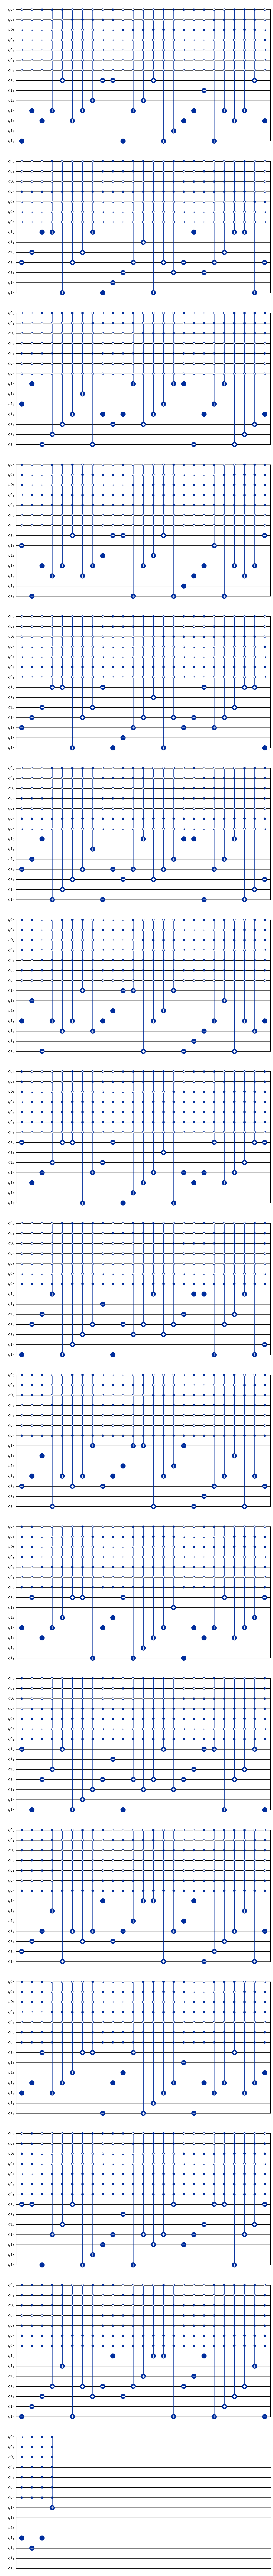

In [11]:
tQ.binary_function(fout_binary).draw('mpl')

Now we generate the *Period Search Circuit* and run it in two similar cases.
<br>
1. $ n=7~\to~N=2^7 ~,~ P = 4=2^2 ~~~\hbox{  that is  } ~~~ N/P = 2^5 = 32 \in {\mathbb Z} $
<br>
In this case, we have an exact number of $32$ repetitions of a period of $P=4$ elements
<br>
<br>

2. $ n=7~\to N=2^7 ~, ~ P = 5 ~~~\hbox{  that is  } ~~~ N/P = 25.6 \notin {\mathbb Z} $
<br>
In this case, after 25 repetitions, there is still a chain of $0.6 P$ values left to complete $N$.

In [23]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
n=7
#dominio
Nn=2**n
#rango
Nm = Nn  # esta opción no es obligatoria. Sólo es necesario que N'>P
#período
P=5
print('N = 2^n =',Nn, ', P =', P, ', M =', int(Nn/P), ', resto=',Nn%P)
# el oráculo que genera una funcion períodica con valores f(0),f(1),...,f(P-1) que se repiten M veces (aprox)
fout_list, fout = f_periodica(Nn,Nm,P,show_values=False)        
periodic_oracle = tQ.binary_function(fout_list).to_gate(label='f(x+P)=f(x)')

qr_in = QuantumRegister(n, name='x')
qr_out = QuantumRegister(n, name='f(x)')
cr = ClassicalRegister(n, name='meas_in')
qc = QuantumCircuit(qr_in, qr_out, cr,name='q')
# Aplicamos la puerta de Walsh-Hadamard al primer registro
qc.h(qr_in)
qc.barrier()
# Añadimos el oráculo
qc.append(periodic_oracle,qr_in[:] + qr_out[:])    
qc.barrier()x
# Medimos el registro de los cúbits de |f(x)>
#qc.measure(qr_out, cr_out)
#qc.barrier()
# Aplicamos la Transformada de Fourier al primer registro
qc.append(tQ.TFC(n),qr_in)
qc.barrier()

# Finalmente medimos el registro de los inputs |x>
qc.measure(qr_in, cr)   

N = 2^n = 128 , P = 5 , M = 25 , resto= 3


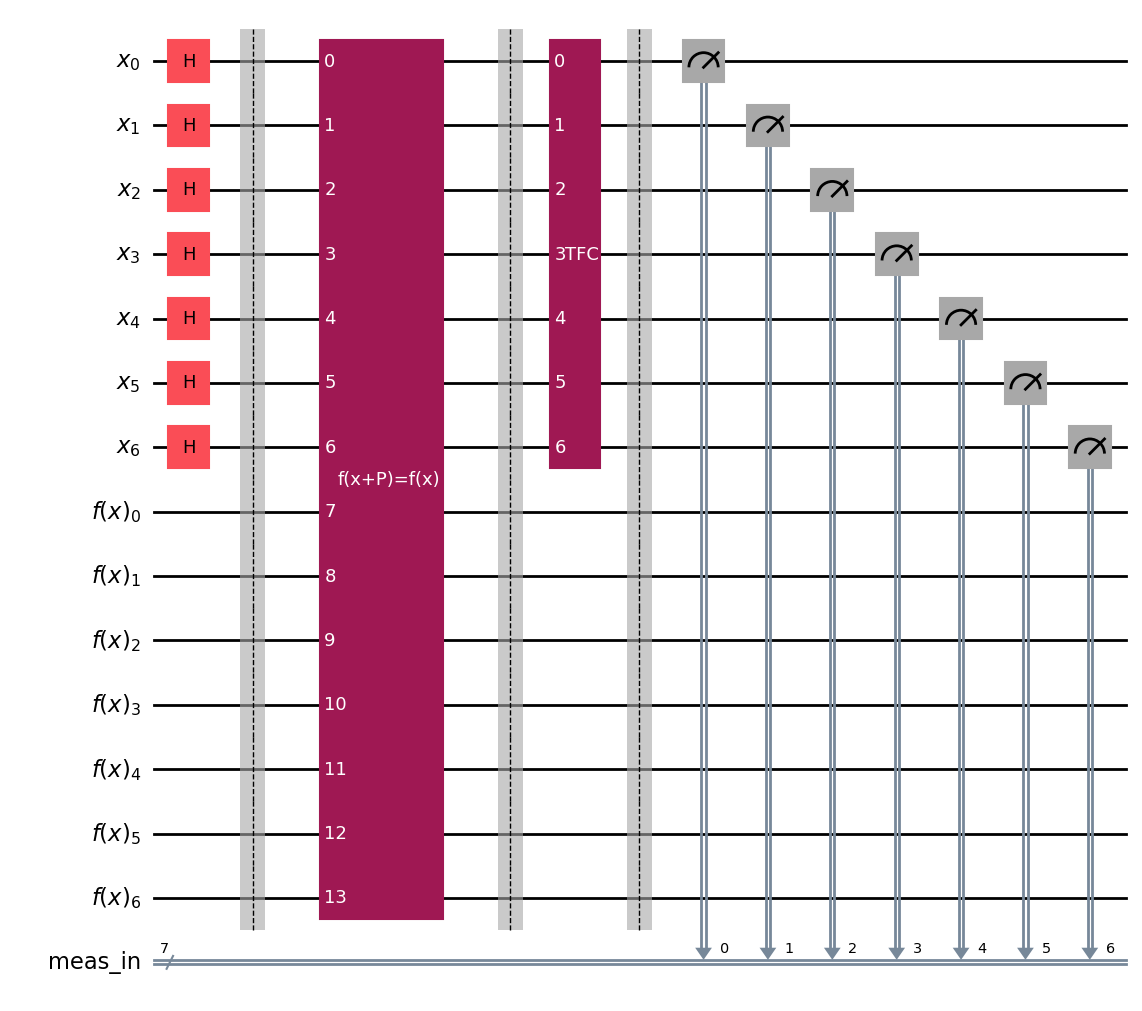

In [24]:
qc.draw('mpl')

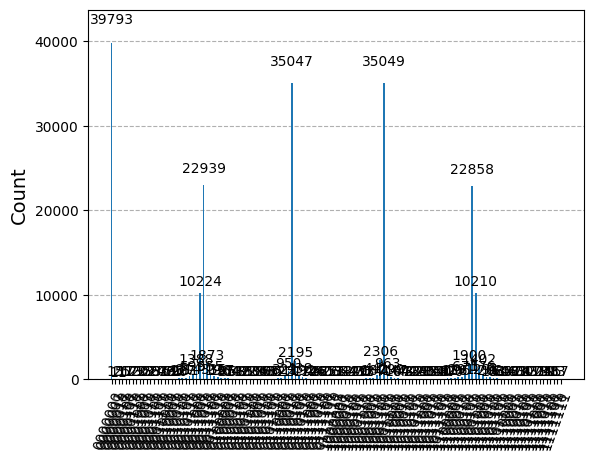

In [26]:
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile

shots_exe = 200000

backend = AerSimulator()
counts     = backend.run(transpile(qc,backend), shots = shots_exe).result().get_counts()

from qiskit.visualization import plot_histogram

plot_histogram(counts)

- If $N/P$ is an integer, the distribution is uniform across a few values. We must select those that have a common first record


- If $N/P$ is not an integer, we observe that the distribution is very peaked around a few values.

  If the circuit had been run only once, the probability of obtaining a value outside of those peaks is very low. We will continue working with the collective results and will return to this observation at the end.

Now we filter the outputs that have the same value of the first record (same qubit) and exceed a probability threshold (number of events)


(When $N/p \notin {\mathbb Z} $, vary the threshold to select the probability peaks)

In [28]:
#post-selección

projected_counts = {k: v for k, v in counts.items() if  v>20000 }
#print(projected_counts)
plot_histogram(projected_counts)

print(projected_counts)

{'0011010': 22939, '0000000': 39793, '0110011': 35047, '1001101': 35049, '1100110': 22858}


 From the reading of the second record, we obtain the list of integer values $\{N_s\}$ that form the best approximation to $\{s N/P\}$.

 By dividing by $N$, we will obtain the list $\{\varphi_s\}\in [0,1)$ that best approximates the values we are looking for $\{s/P\}~, s=1,2,..$.

In [29]:
# extraemos las 'keys' del segundo registro, rechazando el 00...0 que siempre está
Ns_list = sorted([int(keys,2) for  keys in projected_counts])[1:] 
print('{Ns} ~ ', Ns_list)
N = Nn 

# dividiendo por N
phis_list = [Ns_list[i]/N for i in range(len(Ns_list))]
print('phi_s', phis_list)


{Ns} ~  [26, 51, 77, 102]
phi_s [0.203125, 0.3984375, 0.6015625, 0.796875]


The last part of the post-processing consists of figuring out which pair of integers, $s$ and $P$, are hidden behind the list $\{\varphi_s\}$ found. 


**Strategy 1**: by simply subtracting successive elements, we have a list

$$
[(\varphi_{s+1} -\varphi_s)^{-1}]\sim \left[\left(\frac{s+1}{P} - \frac{s}{P}\right)^{-1} \right] =
\left[P \right] \sim   P
$$


In [30]:
P_list = [(phis_list[s+1]-phis_list[s])**(-1) for s in range(len(phis_list)-1)]

print(P_list)

print('el valor entero del promedio =', int(sum(P_list)/len(P_list)))

[5.12, 4.923076923076923, 5.12]
el valor entero del promedio = 5



**Strategy 2**:

Representing a rational number $a \in {\mathbb Q}$ as a quotient of two integers $a = s/P$ is something that can be achieved from its expression in [continued fractions](https://en.wikipedia.org/wiki/Continued_fraction)
<br>

Python's [Fraction](https://docs.python.org/3/library/fractions.html) class already includes this utility.

In [ ]:
from fractions import Fraction

[Fraction(phis_list[i]) for i in range(len(phis_list))]

The method can produce incorrect answers for two reasons:

-  that $s$ is a divisor of $P$
<br>
<br>
-  that $\varphi_s \sim s/P$. In that case, the method yields two integers $s'/P'$ greater than $s'>s$ and $P'>P$.
<br>
<br>

The second case is the generic one when $N/P \notin {\mathbb Z} $ and it is controlled by limiting the value of $P$ in the quotient $s/P$ which must approximate $\varphi_s$.

In [ ]:
[Fraction(phis_list[i]).limit_denominator(20) for i in range(int(len(phis_list)))]

<br>

**In any case**: *verify* if a value is a *solution or not* is a task that can classically be performed efficiently.

<div class="alert alert-block alert-danger">
<b> Warning: </b>

 The period-finding algorithm allows for an exponential advantage if we do not count the depth of the oracle. 
<br>
<br>
    
 However, we have already seen in the previous example that the way to construct the oracle associated with the function $f(x+P)=f(x)$ involves implementing the <i> truth table </i> of $P$ distinct values $f(0),....,f(P-1)$. For a $P$ of ${\cal O}(N)$, we see that the <i>depth of the oracle</i> grows exponentially.
<br>   
<br> 
    
Therefore, the quantum advantage only exists in cases of functions for which it is possible to implement via an oracle such that its depth grows polynomially with the size of the register $n$.
</div>